In [47]:
import utils
import os
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload
from tqdm import tqdm

In [25]:
reload(utils)

<module 'utils' from '/Users/Salim/Desktop/affh/utils.py'>

In [18]:
cities = utils.get_cities()

In [19]:
if not os.path.isdir('./figures'):
    os.mkdir('./figures')

In [20]:
def save_plot(plot_fn, city, cycle, variable_name, *args):
    plt.clf()
    plot_fn(city, cycle, *args)
    plt.savefig(f'./figures/{city}/{cycle}th_cycle_{variable_name}.png')
    plt.close()

In [28]:
%%time
for city in tqdm(cities):
    if not os.path.isdir(f'./figures/{city}'):
        os.mkdir(f'./figures/{city}')
        
    for cycle in [4, 5]:
        save_plot(utils.plot_sites_on_pollution_map, city, cycle, 'aggregate_pollution')
        save_plot(utils.plot_sites_on_diesel_particulate_map, city, cycle, 'rhna_diesel')
        save_plot(utils.plot_sites_on_lead_map, city, cycle, 'lead')
        save_plot(utils.plot_sites_on_hazardous_waste_map, city, cycle, 'waste')
        save_plot(utils.plot_sites_on_traffic_map, city, cycle, 'traffic')
        save_plot(utils.plot_sites_and_parks, city, cycle, 'park_space')
        save_plot(utils.plot_sites_on_schools, city, cycle, 'schools', 'AbsentPct')
        save_plot(utils.plot_sites_on_opportunity, city, cycle, "opportunity")

  0%|          | 0/100 [00:00<?, ?it/s]/Users/Salim/Library/Python/3.8/lib/python/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/Salim/Library/Python/3.8/lib/python/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
  1%|          | 1/100 [00:09<16:26,  9.97s/it]/Users/Salim/Library/Python/3.8/lib/python/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/Salim/Library/Python/3.8/lib/python/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
  2%|▏         | 2/100 [00:28<24:54, 15.26s/it]/Users/Salim/Library/Python/3.8/lib/python/site-packages/geopandas/plotting.py:678:

CPU times: user 19min 2s, sys: 36.4 s, total: 19min 38s
Wall time: 26min 2s


<Figure size 432x288 with 0 Axes>

In [41]:
for city in cities:
    overlap = utils.get_4th_cycle_sites_for(city).apn.isin(utils.get_5th_cycle_sites_for(city).apn).mean()
    if overlap > .9:
        print(city, overlap)

Albany 0.95
Atherton 0.9852941176470589
Berkeley 0.954653937947494
Los Altos Hills 0.9453125
Millbrae 0.9921259842519685
Novato 0.9855072463768116
Piedmont 0.9298245614035088
Pinole 0.9193548387096774
Pleasant Hill 1.0
Richmond 0.9053497942386831
Rio Vista 1.0
San Mateo 0.9895833333333334
San Pablo 1.0
Sausalito 0.9885057471264368
Woodside 0.9742647058823529


Text(0.5, 1.0, 'Distribution of 5th RHNA Cycle that were Recycled from 4th Cycle')

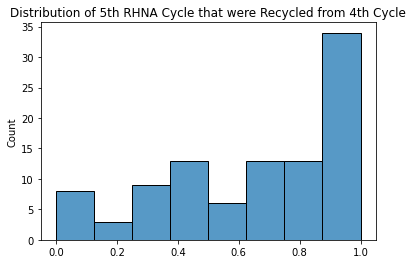

In [51]:
overlaps = []
for city in cities:
    overlaps.append(utils.get_5th_cycle_sites_for(city).apn.isin(utils.get_4th_cycle_sites_for(city).apn).mean())
sns.histplot(overlaps)
plt.title('Distribution of 5th RHNA Cycle that were Recycled from 4th Cycle')

Text(0.5, 1.0, 'Distribution of 5th RHNA Cycle that were Recycled')

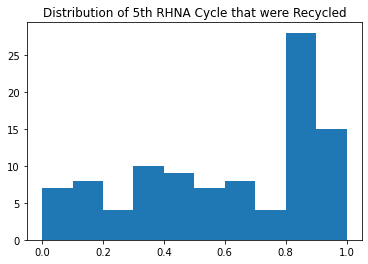

In [45]:
overlaps = []
for city in cities:
    overlaps.append(utils.get_4th_cycle_sites_for(city).apn.isin(utils.get_5th_cycle_sites_for(city).apn).mean())
plt.hist(overlaps)
plt.title('Distribution of 4th RHNA Cycle that were Recycled')